In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [4]:
workpath = os.getcwd()
dbpath = '/home/idies/workspace/lsst_cadence/FBS_1.5/'
# dbpath = '/home/idies/workspace/lsst_cadence/FBS_1.4/'

In [5]:
# get the name of all opsim dbs 
import glob

os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
# workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [6]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [7]:
#  get columns from databases
def get_cols(dbfile, cols='night', lim=None):
    """
    cols = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
    connect to database
    Returns: a pandas DataFrame
    
    Examples:
    
    cols = 'night, observationStartMJD, fieldRA, filter, fieldDec, proposalId, note, '

    df = get_cols(dbfile=dbpath + db, cols=cols, lim='night<300')
   
    """
    import sqlite3
    import pandas as pd
    connection = sqlite3.connect(dbfile)
    cursor = connection.cursor()
    
    if lim!=None:
        sqlstr = "SELECT {} FROM SummaryAllProps where {}".format(cols, lim)
    else:
        sqlstr = "SELECT {} FROM SummaryAllProps".format(cols)

    print('connect to ', dbfile, '\n', sqlstr)
    cursor.execute(sqlstr)
    data = cursor.fetchall()
    
    # convert data to dataframe
    data_df = pd.DataFrame(data, columns=cols.split(', '))
    
    # close connection
    connection.close()
    
    return data_df


### WFD

In [25]:
%%time
# calculate the FoM of depth
# 1 - (peak - mag_stretch)
sqlstr = 'proposalId=1'

mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
bins = np.arange(18, 27, 0.01)

dicFoM = {}

filters = ['u', 'g', 'r', 'i', 'z', 'y']
for i, dbname in enumerate( dblist_all):
    df_opsim = get_cols(dbfile=dbpath+dbname,
                   cols='filter, fiveSigmaDepth, night', lim=sqlstr)
    dicFoM[dbname] = {}
    for f in filters:
        m5 = df_opsim [df_opsim['filter']==f]['fiveSigmaDepth'].values
        # method to calculate figure of merit of depth from fiveSigmaDepth
        #values, bins, = np.histogram(m5, bins=bins) 
        #mode = bins[ np.argmax(values) ]
        # 
        mode = np.median(m5)
        
        #FoM =  mode - mag_stretch[f]
        FoM = mode
        #FoM = np.mean(m5)
        
        dicFoM[dbname][f] = FoM
        print(dbname, f, FoM)


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
agnddf_v1.5_10yrs.db u 23.596546835929928
agnddf_v1.5_10yrs.db g 24.553977862122142
agnddf_v1.5_10yrs.db r 24.06381571094485
agnddf_v1.5_10yrs.db i 23.479031220196212
agnddf_v1.5_10yrs.db z 22.802752876109977
agnddf_v1.5_10yrs.db y 22.030345388505168
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_dust_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
alt_dust_v1.5_10yrs.db u 23.552836710528087
alt_dust_v1.5_10yrs.db g 24.514700938296542
alt_dust_v1.5_10yrs.db r 24.009913216028956
alt_dust_v1.5_10yrs.db i 23.41863139915747
alt_dust_v1.5_10yrs.db z 22.746577053651045
alt_dust_v1.5_10yrs.db y 21.973123561257253
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=

dcr_nham2_ugr_v1.5_10yrs.db z 22.80707520208502
dcr_nham2_ugr_v1.5_10yrs.db y 22.02309372370202
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/dcr_nham2_ugri_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
dcr_nham2_ugri_v1.5_10yrs.db u 23.38533955055616
dcr_nham2_ugri_v1.5_10yrs.db g 24.376020740915703
dcr_nham2_ugri_v1.5_10yrs.db r 23.958952654359972
dcr_nham2_ugri_v1.5_10yrs.db i 23.343717509495654
dcr_nham2_ugri_v1.5_10yrs.db z 22.790936973774855
dcr_nham2_ugri_v1.5_10yrs.db y 22.029143264258533
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/descddf_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
descddf_v1.5_10yrs.db u 23.61030956304191
descddf_v1.5_10yrs.db g 24.55643553714681
descddf_v1.5_10yrs.db r 24.06038773035347
descddf_v1.5_10yrs.db i 23.48441537302628
descddf_v1.5_10yrs.db z 22.798301662301505
descddf_v1.5_10yrs.db y 22.03242601899558
connect to  /home/idies/workspace

footprint_newAv1.5_10yrs.db u 23.56502880755454
footprint_newAv1.5_10yrs.db g 24.513600038090424
footprint_newAv1.5_10yrs.db r 24.01654954005643
footprint_newAv1.5_10yrs.db i 23.430127988433377
footprint_newAv1.5_10yrs.db z 22.77599951258125
footprint_newAv1.5_10yrs.db y 21.987379417179085
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_newBv1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
footprint_newBv1.5_10yrs.db u 23.565115255910747
footprint_newBv1.5_10yrs.db g 24.51080930184198
footprint_newBv1.5_10yrs.db r 24.009993947177595
footprint_newBv1.5_10yrs.db i 23.4159335823774
footprint_newBv1.5_10yrs.db z 22.76578199009981
footprint_newBv1.5_10yrs.db y 21.985750944606337
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_no_gp_northv1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
footprint_no_gp_northv1.5_10yrs.db u 23.607416275168767
footprint_no_gp_northv1.5_10yrs.

rolling_mod6_sdf_0.20_v1.5_10yrs.db u 23.57120633558796
rolling_mod6_sdf_0.20_v1.5_10yrs.db g 24.501931245072402
rolling_mod6_sdf_0.20_v1.5_10yrs.db r 23.93268335669096
rolling_mod6_sdf_0.20_v1.5_10yrs.db i 23.326291036768872
rolling_mod6_sdf_0.20_v1.5_10yrs.db z 22.701277694572
rolling_mod6_sdf_0.20_v1.5_10yrs.db y 21.94573252448306
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/short_exp_2ns_1expt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
short_exp_2ns_1expt_v1.5_10yrs.db u 23.40013182115193
short_exp_2ns_1expt_v1.5_10yrs.db g 24.43537349822215
short_exp_2ns_1expt_v1.5_10yrs.db r 24.0083969383131
short_exp_2ns_1expt_v1.5_10yrs.db i 23.408872411421996
short_exp_2ns_1expt_v1.5_10yrs.db z 22.745260434330973
short_exp_2ns_1expt_v1.5_10yrs.db y 21.974832304319307
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/short_exp_2ns_5expt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
sh

wfd_depth_scale0.65_noddf_v1.5_10yrs.db u 23.60616889311701
wfd_depth_scale0.65_noddf_v1.5_10yrs.db g 24.558216241279894
wfd_depth_scale0.65_noddf_v1.5_10yrs.db r 24.065141905165248
wfd_depth_scale0.65_noddf_v1.5_10yrs.db i 23.48021428025722
wfd_depth_scale0.65_noddf_v1.5_10yrs.db z 22.81146009488977
wfd_depth_scale0.65_noddf_v1.5_10yrs.db y 22.036036480832543
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.65_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
wfd_depth_scale0.65_v1.5_10yrs.db u 23.611567960214323
wfd_depth_scale0.65_v1.5_10yrs.db g 24.548665270181708
wfd_depth_scale0.65_v1.5_10yrs.db r 24.053774237798127
wfd_depth_scale0.65_v1.5_10yrs.db i 23.45460038179209
wfd_depth_scale0.65_v1.5_10yrs.db z 22.79975648670085
wfd_depth_scale0.65_v1.5_10yrs.db y 22.024379463275285
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.70_noddf_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM Su

In [27]:
df = pd.DataFrame( dicFoM ).T
df = df.reset_index()
df = df.rename(columns = {'index':'db'})
df.to_csv('data/depthFoM_mag_v1.5.csv', index=False)
#df

In [28]:
df.head()

,db,g,i,r,u,y,z
0,agnddf_v1.5_10yrs.db,24.553978,23.479031,24.063816,23.596547,22.030345,22.802753
1,alt_dust_v1.5_10yrs.db,24.514701,23.418631,24.009913,23.552837,21.973124,22.746577
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db,24.494271,23.352120,23.953845,23.547949,21.930217,22.699220
3,baseline_2snaps_v1.5_10yrs.db,24.486042,23.446335,24.023830,23.409902,22.021757,22.791512
4,baseline_samefilt_v1.5_10yrs.db,24.510252,23.481499,24.008973,23.610257,22.014227,22.745702


In [6]:
def plot_maghist(df_list, label_list, var='fiveSigmaDepth', ylim=[0, 8000], yticks=[]):
    """plot histogram for each filter"""
    bins = np.arange(18, 27, 0.05)
    fig, axs = plt.subplots(6, 1, figsize=(6, 15), 
                            sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0}); 

    axs = axs.flatten()
    FILTERS = ['u', 'g', 'r', 'i', 'z', 'y']

    mag_min = {'u':23.4, 'g':24.6, 'r':24.3, 'i':23.6, 'z':22.9, 'y':21.7 }
    mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }

    for i, f in enumerate(FILTERS):
        ax = axs[i]

        #for j, df in enumerate(df_list):
        #    data = df[df['filter']==f][var].values
        #    ax.hist(data, histtype='step', stacked=False, bins=bins, label=label_list[j],); 

        data_stacked = [df[df['filter']==f][var].values for df in df_list]
        ax.hist(data_stacked, histtype='step', stacked=False, linewidth=2,
                bins=bins, label=label_list, ); 

        ax.set_xlabel('fiveSigmaDepth')
        ax.set_ylabel('Nv (k)')
        ax.set_title(f, position=(0.96, 0.7),)
        ax.set_xlim([19, 26])
        ax.set_xticks(np.arange(19, 26, 1))

        ax.set_ylim(ylim)
        ax.set_yticks(yticks)
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax.yaxis.get_offset_text().set_visible(False)
        
        # fill mag from science require document
        y = np.linspace(0, ax.get_ylim()[1])
        ax.fill_betweenx(y, mag_min[f], mag_stretch[f], color='gray', alpha=0.2)
        
        # draw a line 
        ax.axvline(x=mag_stretch[f], color='black', linewidth=1)

    # add shared legend for all subplots 
    lines = []
    labels = []

    for ax in fig.axes[:1]:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)


    fig.legend(lines, labels,           
               loc = 'upper center')

    fig.tight_layout()
    

In [22]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_dustv1.5_10yrs.db',
 'footprint_big_s

In [7]:
df_base = get_cols(dbfile=dbpath+dblist_all[4], 
                   cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1')
df_short = get_cols(dbfile=dbpath+'short_exp_2ns_1expt_v1.5_10yrs.db',
                    cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1')
df_twilight = get_cols(dbfile=dbpath+'twilight_neo_mod1_v1.5_10yrs.db',
                    cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1') 


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/short_exp_2ns_1expt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/twilight_neo_mod1_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1


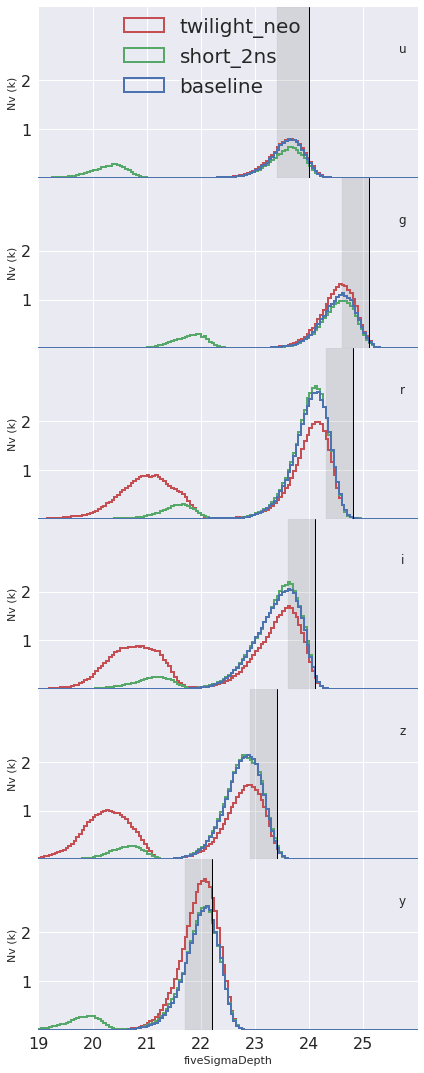

In [8]:
df_list = [df_base,  df_short, df_twilight]
label_list = ['baseline', 'short_2ns', 'twilight_neo']
plot_maghist(df_list, label_list, ylim=[0, 35000], yticks=[10000, 20000])


### GP

In [49]:
def get_pixId(df, nside=16):
    '''get pixId for each field'''
    pixId = RADec2pix(nside, ra=df['fieldRA'].values, dec=df['fieldDec'].values)
    df['pixId'] = pixId
    return df


def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    import healpy as hp
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid


In [50]:
ipix_LMC = [2899, 2900, 2901, 2934, 2935, 2936, 2965, 2966, 2967, 2992, 2993, 2994]
ipix_SMC = [2960, 2961, 2988, 2989, 3012]
ipix_GP = [ 144,  145,  146,  147,  179,  180,  181,  182,  183,  184,  217,
        218,  219,  225,  226,  260,  261,  271,  272,  307,  308,  320,
        321,  358,  374,  413,  431,  432,  471,  472,  493,  534,  535,
        558,  598,  599,  622,  661,  662,  687,  725,  726,  751,  788,
        789,  790,  815,  816,  852,  853,  854,  879,  915,  916,  917,
        944,  979,  980,  981, 1008, 1042, 1043, 1044, 1045, 1073, 1107,
       1108, 1109, 1136, 1170, 1171, 1172, 1201, 1234, 1235, 1236, 1237,
       1265, 1297, 1298, 1299, 1300, 1330, 1361, 1362, 1363, 1364, 1393,
       1425, 1426, 1427, 1428, 1458, 1489, 1490, 1491, 1492, 1522, 1552,
       1553, 1554, 1555, 1587, 1616, 1617, 1618, 1619, 1620, 1650, 1679,
       1680, 1681, 1682, 1683, 1715, 1744, 1745, 1746, 1747, 1779, 1807,
       1808, 1809, 1810, 1811, 1843, 1871, 1872, 1873, 1874, 1875, 1907,
       1934, 1935, 1936, 1937, 1938, 1972, 1998, 1999, 2000, 2001, 2002,
       2003, 2036, 2062, 2063, 2064, 2065, 2066, 2100, 2126, 2127, 2128,
       2129, 2130, 2164, 2189, 2190, 2191, 2192, 2193, 2194, 2229, 2253,
       2254, 2255, 2256, 2257, 2258, 2293, 2316, 2317, 2318, 2319, 2320,
       2321, 2358, 2380, 2381, 2382, 2383, 2384, 2385, 2421, 2422, 2443,
       2444, 2445, 2446, 2447, 2448, 2449, 2486, 2487, 2507, 2508, 2509,
       2510, 2511, 2512, 2513, 2550, 2551, 2570, 2571, 2572, 2573, 2574,
       2575, 2576, 2614, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2673,
       2687, 2688, 2689, 2690, 2691, 2692, 2693, 2728, 2729, 2739, 2740,
       2741, 2742, 2743, 2744, 2745, 2746, 2779, 2780, 2781, 2787, 2788,
       2789, 2790, 2791, 2792, 2793, 2794, 2826, 2827, 2828, 2829, 2830,
       2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2869, 2870,
       2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2908, 2909,
       2910, 2911, 2912, 2913, 2914, 2915, 2916, 2943, 2944, 2945, 2946,
       2947, 2948, 2974, 2975, 2976]



In [57]:
dbname = dblist_all[5]
sqlstr = None
ipix_ms = ipix_SMC


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps


(5,)

In [58]:
ipix_SMC

[2960, 2961, 2988, 2989, 3012]

In [60]:
np.unique( df_opsim_ms['pixId'] )

array([2960, 2961, 2988, 2989, 3012])

In [65]:
for ms, ipix_ms in zip(["GP", "LMC", "SMC"], (ipix_GP, ipix_LMC, ipix_SMC)):
    print(ms, len(ipix_ms))


GP 291
LMC 12
SMC 5


In [70]:
%%time
# calculate the FoM of depth
# 1 - (peak - mag_stretch)
sqlstr = None

mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
bins = np.arange(18, 27, 0.01)

dicFoM = {}

filters = ['u', 'g', 'r', 'i', 'z', 'y']

ms = "GP"
ipix_ms = ipix_GP

for ms, ipix_ms in zip(["GP", "LMC", "SMC"], (ipix_GP, ipix_LMC, ipix_SMC)):
    for i, dbname in enumerate( dblist_all):
        df_opsim = get_cols(dbfile=dbpath+dbname,
                   cols='fieldRA, fieldDec, filter, fiveSigmaDepth, night', lim=sqlstr)
    
        df_opsim = get_pixId(df_opsim, nside=16)
    
        idx = np.isin(df_opsim['pixId'].values, ipix_ms)

        df_opsim_ms = df_opsim[idx]

        print( ms, len(ipix_ms), dbname, np.unique( df_opsim_ms['pixId'] ).shape )
        
        dicFoM[dbname] = {}
        for f in filters:
            
            
            m5 = df_opsim_ms [df_opsim_ms['filter']==f]['fiveSigmaDepth'].values
            # method to calculate figure of merit of depth from fiveSigmaDepth
            #values, bins, = np.histogram(m5, bins=bins) 
            #mode = bins[ np.argmax(values) ]
            # 
            
            mode = np.median(m5)
            
            #FoM =  mode - mag_stretch[f]
            FoM = mode
            #FoM = np.mean(m5)
            
            dicFoM[dbname][f] = FoM
            print(dbname, len(m5), f, FoM)
    
    df = pd.DataFrame( dicFoM ).T
    df = df.reset_index()
    df = df.rename(columns = {'index':'db'})
    df.to_csv('data/depthFoM_mag_{}_v1.5.csv'.format(ms), index=False)
    

connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
GP 291 agnddf_v1.5_10yrs.db (254,)
agnddf_v1.5_10yrs.db 14968 u 23.468845162221495
agnddf_v1.5_10yrs.db 20478 g 24.42788452006662
agnddf_v1.5_10yrs.db 35399 r 23.982907818643657
agnddf_v1.5_10yrs.db 35465 i 23.384127700295085
agnddf_v1.5_10yrs.db 32484 z 22.74543240349455
agnddf_v1.5_10yrs.db 34665 y 21.979146824621566
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_dust_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
GP 291 alt_dust_v1.5_10yrs.db (252,)
alt_dust_v1.5_10yrs.db 11774 u 23.448023898791945
alt_dust_v1.5_10yrs.db 15579 g 24.368164553203588
alt_dust_v1.5_10yrs.db 24117 r 23.888368259954664
alt_dust_v1.5_10yrs.db 24734 i 23.27207418436977
alt_dust_v1.5_10yrs.db 23183 z 22.673618394309734
alt_dust_v1.5_10yrs.db 25020 y 21.93355481844339
connect to  /home/idies/workspac

GP 291 dcr_nham1_ugri_v1.5_10yrs.db (254,)
dcr_nham1_ugri_v1.5_10yrs.db 15314 u 23.374751700326826
dcr_nham1_ugri_v1.5_10yrs.db 20399 g 24.352510520439935
dcr_nham1_ugri_v1.5_10yrs.db 35449 r 23.94731640303973
dcr_nham1_ugri_v1.5_10yrs.db 35559 i 23.324014538466262
dcr_nham1_ugri_v1.5_10yrs.db 32380 z 22.733409623649273
dcr_nham1_ugri_v1.5_10yrs.db 34701 y 21.967567633942778
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/dcr_nham2_ug_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
GP 291 dcr_nham2_ug_v1.5_10yrs.db (254,)
dcr_nham2_ug_v1.5_10yrs.db 15409 u 23.34639639304924
dcr_nham2_ug_v1.5_10yrs.db 20125 g 24.309299916895192
dcr_nham2_ug_v1.5_10yrs.db 35104 r 23.961831034816996
dcr_nham2_ug_v1.5_10yrs.db 35529 i 23.397909251403572
dcr_nham2_ug_v1.5_10yrs.db 32182 z 22.736006054902383
dcr_nham2_ug_v1.5_10yrs.db 34773 y 21.984969375272062
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/dcr_nham2_ugr_v1.5_10yrs.db 
 SELECT field

GP 291 footprint_big_sky_nouiyv1.5_10yrs.db (48,)
footprint_big_sky_nouiyv1.5_10yrs.db 15 u 23.54083126738679
footprint_big_sky_nouiyv1.5_10yrs.db 2266 g 23.87741591826583
footprint_big_sky_nouiyv1.5_10yrs.db 3003 r 23.473775081995377
footprint_big_sky_nouiyv1.5_10yrs.db 47 i 23.283487940054098
footprint_big_sky_nouiyv1.5_10yrs.db 2926 z 22.09848702836927
footprint_big_sky_nouiyv1.5_10yrs.db 50 y 22.01552348239974
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_big_skyv1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
GP 291 footprint_big_skyv1.5_10yrs.db (47,)
footprint_big_skyv1.5_10yrs.db 22 u 23.524286108691896
footprint_big_skyv1.5_10yrs.db 2132 g 23.942891438317915
footprint_big_skyv1.5_10yrs.db 3110 r 23.48679726637988
footprint_big_skyv1.5_10yrs.db 3393 i 22.76842856909275
footprint_big_skyv1.5_10yrs.db 2956 z 22.220818238734154
footprint_big_skyv1.5_10yrs.db 58 y 21.901574706367526
connect to  /home/idies/workspace/lss

GP 291 greedy_footprint_v1.5_10yrs.db (254,)
greedy_footprint_v1.5_10yrs.db 15326 u 23.459058958582197
greedy_footprint_v1.5_10yrs.db 20325 g 24.4006533726684
greedy_footprint_v1.5_10yrs.db 35648 r 23.96735396544734
greedy_footprint_v1.5_10yrs.db 36161 i 23.35860222263612
greedy_footprint_v1.5_10yrs.db 32221 z 22.7558817873653
greedy_footprint_v1.5_10yrs.db 34994 y 21.984172237175404
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
GP 291 roll_mod2_dust_sdf_0.20_v1.5_10yrs.db (252,)
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 11766 u 23.43329174627895
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 15599 g 24.347677082722754
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 24851 r 23.897881892328215
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 25273 i 23.314938113876373
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 24102 z 22.680463115573055
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 25903 y 21.940754495593083


GP 291 third_obs_pt30v1.5_10yrs.db (254,)
third_obs_pt30v1.5_10yrs.db 15121 u 23.45369023694923
third_obs_pt30v1.5_10yrs.db 20253 g 24.42113952492014
third_obs_pt30v1.5_10yrs.db 35601 r 23.978935094106646
third_obs_pt30v1.5_10yrs.db 35684 i 23.375838591509368
third_obs_pt30v1.5_10yrs.db 32711 z 22.739138573812337
third_obs_pt30v1.5_10yrs.db 34825 y 21.978939762962536
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/third_obs_pt45v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
GP 291 third_obs_pt45v1.5_10yrs.db (254,)
third_obs_pt45v1.5_10yrs.db 15179 u 23.449401327477844
third_obs_pt45v1.5_10yrs.db 20426 g 24.41167021182992
third_obs_pt45v1.5_10yrs.db 35684 r 23.98294845811845
third_obs_pt45v1.5_10yrs.db 35566 i 23.373944616667348
third_obs_pt45v1.5_10yrs.db 32669 z 22.75815125062509
third_obs_pt45v1.5_10yrs.db 35106 y 21.97745140597364
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/third_obs_pt60v1.5_10yrs.db 
 SELECT fieldRA,

GP 291 wfd_depth_scale0.75_v1.5_10yrs.db (254,)
wfd_depth_scale0.75_v1.5_10yrs.db 20866 u 23.46759936342464
wfd_depth_scale0.75_v1.5_10yrs.db 26096 g 24.437404853639908
wfd_depth_scale0.75_v1.5_10yrs.db 40166 r 23.979641790516112
wfd_depth_scale0.75_v1.5_10yrs.db 40223 i 23.361750052714665
wfd_depth_scale0.75_v1.5_10yrs.db 37086 z 22.738703913398243
wfd_depth_scale0.75_v1.5_10yrs.db 37031 y 21.983054718747827
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.80_noddf_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
GP 291 wfd_depth_scale0.80_noddf_v1.5_10yrs.db (254,)
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 19454 u 23.483874973034418
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 24772 g 24.430318456091726
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 39786 r 23.97573216836069
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 39924 i 23.369158302298246
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 36887 z 22.717954893927423
wfd_depth_scale0.80_noddf

LMC 12 baseline_2snaps_v1.5_10yrs.db (12,)
baseline_2snaps_v1.5_10yrs.db 617 u 23.313838682011788
baseline_2snaps_v1.5_10yrs.db 732 g 24.455264829619118
baseline_2snaps_v1.5_10yrs.db 1000 r 24.028067663239383
baseline_2snaps_v1.5_10yrs.db 964 i 23.433149026884813
baseline_2snaps_v1.5_10yrs.db 929 z 22.829157241021754
baseline_2snaps_v1.5_10yrs.db 1085 y 22.00440157785225
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_samefilt_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
LMC 12 baseline_samefilt_v1.5_10yrs.db (12,)
baseline_samefilt_v1.5_10yrs.db 803 u 23.43300535738864
baseline_samefilt_v1.5_10yrs.db 849 g 24.564699989203294
baseline_samefilt_v1.5_10yrs.db 1053 r 24.002285014906136
baseline_samefilt_v1.5_10yrs.db 1081 i 23.39912664599219
baseline_samefilt_v1.5_10yrs.db 1055 z 22.800456420231242
baseline_samefilt_v1.5_10yrs.db 1079 y 22.013324120712145
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10

LMC 12 descddf_v1.5_10yrs.db (12,)
descddf_v1.5_10yrs.db 650 u 23.506542158804866
descddf_v1.5_10yrs.db 760 g 24.561950521501743
descddf_v1.5_10yrs.db 1027 r 24.03305460697517
descddf_v1.5_10yrs.db 1001 i 23.405791606169046
descddf_v1.5_10yrs.db 946 z 22.81038300984349
descddf_v1.5_10yrs.db 1127 y 22.018872794509253
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/filterdist_indx1_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
LMC 12 filterdist_indx1_v1.5_10yrs.db (3,)
filterdist_indx1_v1.5_10yrs.db 344 u 23.529636042380332
filterdist_indx1_v1.5_10yrs.db 358 g 24.563962557955886
filterdist_indx1_v1.5_10yrs.db 356 r 24.007308723169032
filterdist_indx1_v1.5_10yrs.db 328 i 23.25906409592201
filterdist_indx1_v1.5_10yrs.db 360 z 22.774889820860118
filterdist_indx1_v1.5_10yrs.db 375 y 22.019644480769056
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/filterdist_indx2_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, n

LMC 12 footprint_gp_smoothv1.5_10yrs.db (12,)
footprint_gp_smoothv1.5_10yrs.db 634 u 23.47178892753106
footprint_gp_smoothv1.5_10yrs.db 739 g 24.569671214655315
footprint_gp_smoothv1.5_10yrs.db 952 r 24.02571699874212
footprint_gp_smoothv1.5_10yrs.db 995 i 23.443524077191167
footprint_gp_smoothv1.5_10yrs.db 949 z 22.831200824726512
footprint_gp_smoothv1.5_10yrs.db 1139 y 21.994407452608105
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_newAv1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
LMC 12 footprint_newAv1.5_10yrs.db (12,)
footprint_newAv1.5_10yrs.db 834 u 23.447509158703866
footprint_newAv1.5_10yrs.db 1122 g 24.4791871577007
footprint_newAv1.5_10yrs.db 2526 r 23.956877626350497
footprint_newAv1.5_10yrs.db 2558 i 23.330147924701357
footprint_newAv1.5_10yrs.db 2278 z 22.744515229759266
footprint_newAv1.5_10yrs.db 2405 y 21.941763158493494
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_newBv1.5_10yrs.db 

LMC 12 rolling_mod3_sdf_0.10_v1.5_10yrs.db (12,)
rolling_mod3_sdf_0.10_v1.5_10yrs.db 628 u 23.510446187501458
rolling_mod3_sdf_0.10_v1.5_10yrs.db 746 g 24.529732125963662
rolling_mod3_sdf_0.10_v1.5_10yrs.db 987 r 24.02950416831934
rolling_mod3_sdf_0.10_v1.5_10yrs.db 999 i 23.335870356862138
rolling_mod3_sdf_0.10_v1.5_10yrs.db 965 z 22.722819919688092
rolling_mod3_sdf_0.10_v1.5_10yrs.db 1123 y 21.951176508987125
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/rolling_mod3_sdf_0.20_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
LMC 12 rolling_mod3_sdf_0.20_v1.5_10yrs.db (12,)
rolling_mod3_sdf_0.20_v1.5_10yrs.db 635 u 23.522582934677047
rolling_mod3_sdf_0.20_v1.5_10yrs.db 741 g 24.55456083398558
rolling_mod3_sdf_0.20_v1.5_10yrs.db 962 r 24.00773151349674
rolling_mod3_sdf_0.20_v1.5_10yrs.db 975 i 23.242093624897205
rolling_mod3_sdf_0.20_v1.5_10yrs.db 967 z 22.739526780318396
rolling_mod3_sdf_0.20_v1.5_10yrs.db 1176 y 21.969757573844937
c

LMC 12 twilight_neo_mod1_v1.5_10yrs.db (12,)
twilight_neo_mod1_v1.5_10yrs.db 573 u 23.521620135334782
twilight_neo_mod1_v1.5_10yrs.db 669 g 24.50280792973994
twilight_neo_mod1_v1.5_10yrs.db 1026 r 24.001239383858426
twilight_neo_mod1_v1.5_10yrs.db 1059 i 23.339602015448353
twilight_neo_mod1_v1.5_10yrs.db 978 z 22.75527604971152
twilight_neo_mod1_v1.5_10yrs.db 1131 y 21.984272342841987
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/twilight_neo_mod2_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
LMC 12 twilight_neo_mod2_v1.5_10yrs.db (12,)
twilight_neo_mod2_v1.5_10yrs.db 623 u 23.528684537016087
twilight_neo_mod2_v1.5_10yrs.db 707 g 24.567267038544365
twilight_neo_mod2_v1.5_10yrs.db 1065 r 24.017047613223713
twilight_neo_mod2_v1.5_10yrs.db 1038 i 23.378978981622893
twilight_neo_mod2_v1.5_10yrs.db 960 z 22.81169995258298
twilight_neo_mod2_v1.5_10yrs.db 1104 y 21.999597944110434
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/tw

LMC 12 wfd_depth_scale0.85_v1.5_10yrs.db (12,)
wfd_depth_scale0.85_v1.5_10yrs.db 763 u 23.480852015785253
wfd_depth_scale0.85_v1.5_10yrs.db 880 g 24.497731263983106
wfd_depth_scale0.85_v1.5_10yrs.db 1115 r 23.995243542697878
wfd_depth_scale0.85_v1.5_10yrs.db 1086 i 23.336229663822188
wfd_depth_scale0.85_v1.5_10yrs.db 1048 z 22.807835555550998
wfd_depth_scale0.85_v1.5_10yrs.db 1237 y 21.991148702233286
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.90_noddf_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
LMC 12 wfd_depth_scale0.90_noddf_v1.5_10yrs.db (12,)
wfd_depth_scale0.90_noddf_v1.5_10yrs.db 678 u 23.468580880855892
wfd_depth_scale0.90_noddf_v1.5_10yrs.db 792 g 24.55664939791165
wfd_depth_scale0.90_noddf_v1.5_10yrs.db 1037 r 23.961987943913158
wfd_depth_scale0.90_noddf_v1.5_10yrs.db 1022 i 23.403332867984282
wfd_depth_scale0.90_noddf_v1.5_10yrs.db 971 z 22.826075984684312
wfd_depth_scale0.90_noddf_v1.5_10yrs.db 11

SMC 5 bulges_cadence_bs_v1.5_10yrs.db (5,)
bulges_cadence_bs_v1.5_10yrs.db 322 u 23.283563461697966
bulges_cadence_bs_v1.5_10yrs.db 422 g 24.264732046046277
bulges_cadence_bs_v1.5_10yrs.db 923 r 23.790023938564808
bulges_cadence_bs_v1.5_10yrs.db 935 i 22.952358622897414
bulges_cadence_bs_v1.5_10yrs.db 856 z 22.478072546365226
bulges_cadence_bs_v1.5_10yrs.db 971 y 21.76313135955549
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/bulges_cadence_bulge_wfd_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
SMC 5 bulges_cadence_bulge_wfd_v1.5_10yrs.db (5,)
bulges_cadence_bulge_wfd_v1.5_10yrs.db 325 u 23.308334972587215
bulges_cadence_bulge_wfd_v1.5_10yrs.db 430 g 24.34291460570369
bulges_cadence_bulge_wfd_v1.5_10yrs.db 905 r 23.802325379840397
bulges_cadence_bulge_wfd_v1.5_10yrs.db 943 i 22.97145717269667
bulges_cadence_bulge_wfd_v1.5_10yrs.db 862 z 22.463958695059695
bulges_cadence_bulge_wfd_v1.5_10yrs.db 932 y 21.764731061297677
connect to 

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


SMC 5 filterdist_indx2_v1.5_10yrs.db (0,)
filterdist_indx2_v1.5_10yrs.db 0 u nan
filterdist_indx2_v1.5_10yrs.db 0 g nan
filterdist_indx2_v1.5_10yrs.db 0 r nan
filterdist_indx2_v1.5_10yrs.db 0 i nan
filterdist_indx2_v1.5_10yrs.db 0 z nan
filterdist_indx2_v1.5_10yrs.db 0 y nan
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/filterdist_indx3_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
SMC 5 filterdist_indx3_v1.5_10yrs.db (0,)
filterdist_indx3_v1.5_10yrs.db 0 u nan
filterdist_indx3_v1.5_10yrs.db 0 g nan
filterdist_indx3_v1.5_10yrs.db 0 r nan
filterdist_indx3_v1.5_10yrs.db 0 i nan
filterdist_indx3_v1.5_10yrs.db 0 z nan
filterdist_indx3_v1.5_10yrs.db 0 y nan
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/filterdist_indx4_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
SMC 5 filterdist_indx4_v1.5_10yrs.db (0,)
filterdist_indx4_v1.5_10yrs.db 0 u nan
filterdist_indx4_v1.5_10yrs.db 0 g na

SMC 5 footprint_standard_goalsv1.5_10yrs.db (5,)
footprint_standard_goalsv1.5_10yrs.db 253 u 23.301951248627056
footprint_standard_goalsv1.5_10yrs.db 267 g 24.35705994744691
footprint_standard_goalsv1.5_10yrs.db 291 r 23.866910340212232
footprint_standard_goalsv1.5_10yrs.db 269 i 23.16793781808426
footprint_standard_goalsv1.5_10yrs.db 269 z 22.557539038443423
footprint_standard_goalsv1.5_10yrs.db 345 y 21.850591029947388
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_stuck_rollingv1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
SMC 5 footprint_stuck_rollingv1.5_10yrs.db (5,)
footprint_stuck_rollingv1.5_10yrs.db 198 u 23.3115669307631
footprint_stuck_rollingv1.5_10yrs.db 224 g 24.372345934254973
footprint_stuck_rollingv1.5_10yrs.db 229 r 23.88560170307077
footprint_stuck_rollingv1.5_10yrs.db 244 i 23.118164383412534
footprint_stuck_rollingv1.5_10yrs.db 248 z 22.637302903293758
footprint_stuck_rollingv1.5_10yrs.db 299 y 21.919

SMC 5 short_exp_2ns_1expt_v1.5_10yrs.db (5,)
short_exp_2ns_1expt_v1.5_10yrs.db 304 u 22.818248587977116
short_exp_2ns_1expt_v1.5_10yrs.db 317 g 23.909892249577698
short_exp_2ns_1expt_v1.5_10yrs.db 331 r 23.42900513428245
short_exp_2ns_1expt_v1.5_10yrs.db 354 i 22.5469490769557
short_exp_2ns_1expt_v1.5_10yrs.db 338 z 22.23416896549234
short_exp_2ns_1expt_v1.5_10yrs.db 393 y 21.628095240757833
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/short_exp_2ns_5expt_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
SMC 5 short_exp_2ns_5expt_v1.5_10yrs.db (5,)
short_exp_2ns_5expt_v1.5_10yrs.db 320 u 22.73080466320937
short_exp_2ns_5expt_v1.5_10yrs.db 331 g 23.79963742435997
short_exp_2ns_5expt_v1.5_10yrs.db 323 r 23.472888847713175
short_exp_2ns_5expt_v1.5_10yrs.db 340 i 22.721808330903507
short_exp_2ns_5expt_v1.5_10yrs.db 346 z 22.223601224879218
short_exp_2ns_5expt_v1.5_10yrs.db 401 y 21.604638129888464
connect to  /home/idies/workspace/lsst_c

SMC 5 var_expt_v1.5_10yrs.db (5,)
var_expt_v1.5_10yrs.db 261 u 23.066418902528866
var_expt_v1.5_10yrs.db 267 g 24.286387978885625
var_expt_v1.5_10yrs.db 286 r 23.925850490907223
var_expt_v1.5_10yrs.db 272 i 23.41167750754519
var_expt_v1.5_10yrs.db 263 z 22.896575321676615
var_expt_v1.5_10yrs.db 338 y 21.836836874274177
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.65_noddf_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
SMC 5 wfd_depth_scale0.65_noddf_v1.5_10yrs.db (5,)
wfd_depth_scale0.65_noddf_v1.5_10yrs.db 608 u 23.308601961852588
wfd_depth_scale0.65_noddf_v1.5_10yrs.db 639 g 24.336173187115286
wfd_depth_scale0.65_noddf_v1.5_10yrs.db 642 r 23.74836943063533
wfd_depth_scale0.65_noddf_v1.5_10yrs.db 652 i 22.809103155303532
wfd_depth_scale0.65_noddf_v1.5_10yrs.db 653 z 22.37362545976626
wfd_depth_scale0.65_noddf_v1.5_10yrs.db 719 y 21.620001690633103
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_s

SMC 5 wfd_depth_scale0.99_noddf_v1.5_10yrs.db (5,)
wfd_depth_scale0.99_noddf_v1.5_10yrs.db 101 u 23.440019781011987
wfd_depth_scale0.99_noddf_v1.5_10yrs.db 103 g 24.4640150322932
wfd_depth_scale0.99_noddf_v1.5_10yrs.db 114 r 23.988417819344534
wfd_depth_scale0.99_noddf_v1.5_10yrs.db 131 i 23.41070860168798
wfd_depth_scale0.99_noddf_v1.5_10yrs.db 123 z 22.720175707312162
wfd_depth_scale0.99_noddf_v1.5_10yrs.db 157 y 22.00277194150502
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.99_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps
SMC 5 wfd_depth_scale0.99_v1.5_10yrs.db (5,)
wfd_depth_scale0.99_v1.5_10yrs.db 105 u 23.411432396763907
wfd_depth_scale0.99_v1.5_10yrs.db 95 g 24.540186851411914
wfd_depth_scale0.99_v1.5_10yrs.db 107 r 24.082271565010576
wfd_depth_scale0.99_v1.5_10yrs.db 116 i 23.38002093879973
wfd_depth_scale0.99_v1.5_10yrs.db 115 z 22.743690714933546
wfd_depth_scale0.99_v1.5_10yrs.db 191 y 21.97477371787267